In [385]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [52]:
# Set the Pandas library setting
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200

In [ ]:
# Fill the missing columns with mean/most common value in the state

In [320]:
# Read US_counties_COVID19_health_weather_data.csv -- or Read the data from Postgress database (next week's step)
hw_df = pd.read_csv('US_counties_COVID19_health_weather_data.csv')
hw_df.head()

C:\Users\spo.DT\Anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (190,202) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,county,state,fips,cases,deaths,stay_at_home_announced,stay_at_home_effective,lat,lon,total_population,area_sqmi,population_density_per_sqmi,num_deaths,years_of_potential_life_lost_rate,percent_fair_or_poor_health,average_number_of_physically_unhealthy_days,average_number_of_mentally_unhealthy_days,percent_low_birthweight,percent_smokers,percent_adults_with_obesity,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_excessive_drinking,num_alcohol_impaired_driving_deaths,num_driving_deaths,percent_driving_deaths_with_alcohol_involvement,num_chlamydia_cases,chlamydia_rate,teen_birth_rate,num_uninsured,percent_uninsured,num_primary_care_physicians,primary_care_physicians_rate,num_dentists,dentist_rate,num_mental_health_providers,mental_health_provider_rate,preventable_hospitalization_rate,percent_with_annual_mammogram,percent_vaccinated,high_school_graduation_rate,num_some_college,population,percent_some_college,num_unemployed_CHR,labor_force,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,num_single_parent_households_CHR,num_households_CHR,percent_single_parent_households_CHR,num_associations,social_association_rate,annual_average_violent_crimes,violent_crime_rate,num_injury_deaths,injury_death_rate,average_daily_pm2_5,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,overcrowding,inadequate_facilities,percent_drive_alone_to_work,num_workers_who_drive_alone,percent_long_commute_drives_alone,life_expectancy,num_deaths_2,age_adjusted_death_rate,num_deaths_3,child_mortality_rate,num_deaths_4,infant_mortality_rate,percent_frequent_physical_distress,percent_frequent_mental_distress,percent_adults_with_diabetes,num_hiv_cases,hiv_prevalence_rate,num_food_insecure,percent_food_insecure,num_limited_access,percent_limited_access_to_healthy_foods,num_drug_overdose_deaths,drug_overdose_mortality_rate,num_motor_vehicle_deaths,motor_vehicle_mortality_rate,percent_insufficient_sleep,num_uninsured_2,percent_uninsured_2,num_uninsured_3,percent_uninsured_3,other_primary_care_provider_rate,percent_disconnected_youth,average_grade_performance,average_grade_performance_2,...,percent_hispanic,num_non_hispanic_white,percent_non_hispanic_white,num_not_proficient_in_english,percent_not_proficient_in_english,percent_female,num_rural,percent_rural,num_housing_units,num_households_CDC,num_below_poverty,num_unemployed_CDC,per_capita_income,num_no_highschool_diploma,num_age_65_and_older,num_age_17_and_younger,num_disabled,num_single_parent_households_CDC,num_minorities,num_limited_english_abilities,num_multi_unit_housing,num_mobile_homes,num_overcrowding,num_households_with_no_vehicle,num_institutionalized_in_group_quarters,percent_below_poverty,percent_unemployed_CDC,percent_no_highschool_diploma,percent_age_65_and_older,percent_age_17_and_younger,percent_disabled,percent_single_parent_households_CDC,percent_minorities,percent_limited_english_abilities,percent_multi_unit_housing,percent_mobile_homes,percent_overcrowding,percent_no_vehicle,percent_institutionalized_in_group_quarters,percentile_rank_below_poverty,percentile_rank_unemployed,percentile_rank_per_capita_income,percentile_rank_no_highschool_diploma,percentile_rank_socioeconomic_theme,percentile_rank_age_65_and_older,percentile_rank_age_17_and_younger,percentile_rank_disabled,percentile_rank_single_parent_households,percentile_rank_household_comp_disability_theme,percentile_rank_minorities,percentile_rank_limited_english_abilities,percentile_rank_minority_status_and_language_theme,percentile_rank_multi_unit_housing,percentile_rank_mobile_homes,percentile_rank_overcrowding,percentile_rank_no_vehicle,percentile_rank_institutionalized_in_group_quarters,percentile_rank_housing_and_transportation,percentile_rank_social_vulnerability,km_to_closest_station,CALL,ELEV_M,station_id,station_name,mean_temp,min_temp,max_temp,dewpoint,sea_level_pre

In [321]:
# Write the column names to a csv file for clean up 
col_names = pd.DataFrame({'col_name': hw_df.columns})
col_names.to_csv('col_names_all.csv', index=False)

In [322]:
# Share the col_names.csv with team members for selecting useful columns - initial select

In [323]:
# Read the selected columns (status: y=select, n=drop)
col_names_all_cleaned = pd.read_csv('col_names_cleaned.csv')
col_names_rmv = col_names_all_cleaned[col_names_all_cleaned['status']=='n']['col_name'].to_list()
len(col_names_rmv)

107

In [324]:
# Keep the useful columns only
hw_df = hw_df.drop(col_names_rmv, 1)
hw_df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths',
       'population_density_per_sqmi', 'num_deaths',
       'years_of_potential_life_lost_rate', 'percent_fair_or_poor_health',
       ...
       'percentile_rank_minorities',
       'percentile_rank_limited_english_abilities',
       'percentile_rank_minority_status_and_language_theme',
       'percentile_rank_multi_unit_housing', 'percentile_rank_mobile_homes',
       'percentile_rank_overcrowding', 'percentile_rank_no_vehicle',
       'percentile_rank_institutionalized_in_group_quarters',
       'percentile_rank_housing_and_transportation',
       'percentile_rank_social_vulnerability'],
      dtype='object', length=120)

In [325]:
# Get the total number of counties
hw_df['fips'].nunique()

2942

In [327]:
# Find the most recent date of data collection
max_date = hw_df['date'].max()

In [328]:
# Make sure all the counties have info for most recent date of data collection
max_date == hw_df[['fips','date']].groupby('fips').max().reset_index()['date'].unique()[0]

True

In [329]:
# Filter the original dataframe to the max_date
hw_date_df = hw_df[hw_df['date'] == max_date]
len(hw_date_df)

2942

In [330]:
# Define the death_rate column
hw_date_df['death_rate'] = hw_date_df['deaths']/hw_date_df['cases']

C:\Users\spo.DT\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [335]:
# Make sure there is no null value in the death_rate column
0 == len(hw_date_df[hw_date_df['death_rate'].isnull()])

True

In [336]:
# Get the statistics for death_rate column
hw_date_df['death_rate'].describe()

count    2942.000000
mean        0.034882
std         0.053561
min         0.000000
25%         0.000000
50%         0.015958
75%         0.052897
max         1.000000
Name: death_rate, dtype: float64

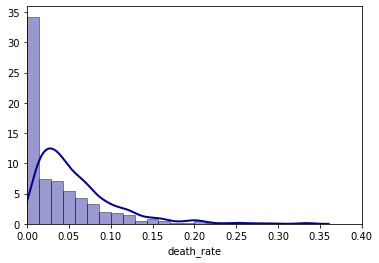

In [337]:
# Plot the density for death_rate
plt.xlim(0, 0.4)
sns.distplot(hw_date_df['death_rate'], hist=True, kde=True, 
             bins=70, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'clip': (0.0, 0.4)})

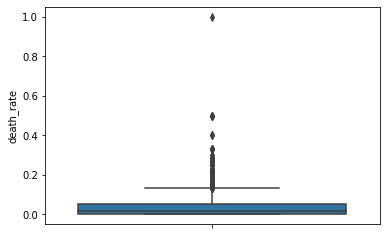

In [338]:
# Plot the box plot for death_rate
ax = sns.boxplot(y='death_rate', data=hw_date_df)

###### There seems to be a lot of noises in the box plot above. Thus, we define a low limit for number of cases per county in order to include the county into the model. The more the cases, the more statistically meaningful the data.

In [341]:
# Use "50" as the 'cases' low limit for including the county
hw_date_df[hw_date_df['cases']>50]['fips'].nunique()

1367

In [345]:
# Use "50" as the 'cases' low limit for including the county, and get the statistics
hw_filtered = hw_date_df[hw_date_df['cases']>50]
hw_filtered['death_rate'].describe()

count    1367.000000
mean        0.045162
std         0.039814
min         0.000000
25%         0.015385
50%         0.035573
75%         0.066381
max         0.274510
Name: death_rate, dtype: float64

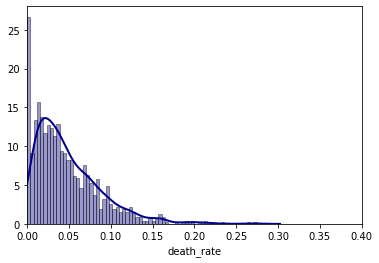

In [346]:
# Plot the density for death_rate
plt.xlim(0, 0.4)
sns.distplot(hw_filtered['death_rate'], hist=True, kde=True, 
             bins=70, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2, 'clip': (0.0, 0.4)})

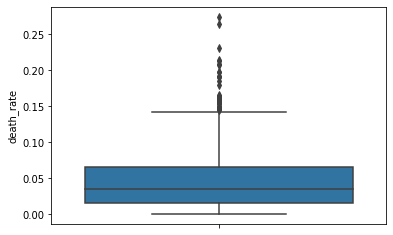

In [347]:
# Plot the box plot for death_rate
ax = sns.boxplot(y='death_rate', data=hw_filtered)

###### Looks better now! less noises.

###### Now, we define a target column as death_risk, assuming: 
######                                                      death_rates below median = low risk
######                                                      death_rates above median = high risk

In [350]:
# Set the median as threshold
death_rate_median = hw_filtered['death_rate'].quantile(0.5)
death_rate_median

0.03557312252964427

In [401]:
# Define the target column
hw_filtered['death_risk'] = hw_filtered['death_rate'].apply(lambda x: 0 if x<death_rate_median else 1)

C:\Users\spo.DT\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## ***Encoding

In [402]:
# Find the categorical columns in hw_filtered and remove them all for now!!! inclusing the target column
hw_filtered_cat = hw_filtered.dtypes[hw_filtered.dtypes == 'object'].index.tolist()
hw_filtered_cat

['date', 'county', 'state', 'fips']

###### The only categorical column to encode is 'presence_of_water_violation'

In [403]:
# Get the unique values in 'presence_of_water_violation' column
hw_filtered['presence_of_water_violation']

174942    0.0
174943    0.0
174944    0.0
174945    0.0
174946    0.0
         ... 
177860    1.0
177868    0.0
177872    1.0
177874    0.0
177881    1.0
Name: presence_of_water_violation, Length: 1367, dtype: float64

In [404]:
# Get the number of unique values in 'presence_of_water_violation' column
hw_filtered['presence_of_water_violation'].nunique()

2

In [405]:
# Encode the 'presence_of_water_violation'
encoding = {False: 0, True: 1}
hw_filtered['presence_of_water_violation'] = hw_filtered['presence_of_water_violation'].map(encoding)

C:\Users\spo.DT\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## ***Manage the null values

In [407]:
# Get the list of columns not useful in ML models
col_rmv = ['date', 'county', 'state', 'fips','death_rate','deaths','cases']

In [408]:
# Remove the columns not useful in ML models
hw_filtered_ML = hw_filtered.drop(col_rmv, 1)

###### In the main code, we'll fill the null values with the state_average. But for now, just replace them with zero.

In [409]:
hw_filtered_ML.fillna('0', inplace=True)

###### For future, we'll try PCA for feature extraction - and for visualization

## ***Create Machine Learning Model preparation

In [410]:
# Remove the target column from dataset
y = hw_filtered_ML.death_risk
X = hw_filtered_ML.drop('death_risk', 1)

In [411]:
# Splitting data into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [412]:
# Create a Standard Scaler instance
scaler = StandardScaler()

# Fit the Standard Scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## ***Random Forest Model

In [416]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=30, random_state=78)

In [417]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [418]:
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f'Random forest predictive accuracy: {accuracy_score(y_test, y_pred):.3f}')

Random forest predictive accuracy: 0.637


In [419]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.02325719800460265, 'percent_american_indian_alaska_native'),
 (0.01956646195211937, 'percent_native_hawaiian_other_pacific_islander'),
 (0.018195009686969528, 'drug_overdose_mortality_rate'),
 (0.018108853984040885, 'percent_uninsured'),
 (0.01515750849735354, 'percent_hispanic'),
 (0.01480202848328746, 'percent_unemployed_CHR'),
 (0.014091020517735474, 'income_ratio'),
 (0.01381278920018106, 'percentile_rank_age_17_and_younger'),
 (0.013192736711604185, 'num_deaths'),
 (0.012496291160323419, 'labor_force'),
 (0.012123152780602713, 'percentile_rank_overcrowding'),
 (0.011959362593378476, 'percent_age_17_and_younger'),
 (0.011688991452431902, 'percent_less_than_18_years_of_age'),
 (0.011598867047570904, 'percent_female'),
 (0.011502464336087974, 'percent_mobile_homes'),
 (0.011382859279866117, 'percentile_rank_mobile_homes'),
 (0.011093315404220967, 'percent_excessive_drinking'),
 (0.010989147373131785, 'chlamydia_rate'),
 (0.010562320702276286, 'high_school_graduation_rate'),
 (0.0

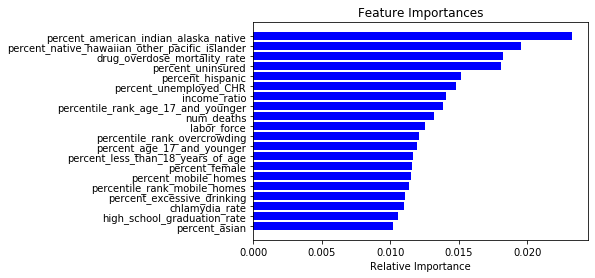

In [420]:
features = X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)
indices = indices[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## ***Logistic Regression Model

## ***SVM Model

## ***Neural Network Model